# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [36]:
# Standard Libraries
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data-Prep
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Buidling and metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
df = pd.read_csv("C:\\Users\\ADMIN\\Documents\\Data\\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [39]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Encoding

Encoding: One-hot is suitable when the categories have no inherent order, like sales channels. If you have ordinal categories (e.g., low, medium, high), then label encoding might be more appropriate, as it captures the order of categories. Always choose the encoding technique based on the nature of the categorical data and the requirements of your machine learning model.

We will use one-hot encoding for 3 columns

In [40]:

df = pd.get_dummies(df, columns=['sales_channel','trip_type', 'flight_day','route','booking_origin'], dtype=int)
df.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0


We will use lable encoding for two columns

Feature Scaling

In [41]:
# Separating dependent and independent variables
X = df.drop(["booking_complete"] , axis=1)
y = df["booking_complete"]

In [42]:
X

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,0,0,1,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [44]:
# Using StandardScaler 
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [45]:
X_scaled_df = pd.DataFrame(X_scaled)

In [46]:
X_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
49996,-0.579559,0.288108,-0.502977,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
49997,-0.579559,-0.673744,-0.502977,2.389544,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435
49998,-0.579559,-0.773246,-0.502977,0.357251,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,...,-0.006325,-0.004472,-0.006325,-0.013418,-0.010001,-0.028995,-0.058924,-0.095937,-0.004472,-0.088435


In [47]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

Checking Data is imbalanced or not

In [48]:
y.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

Our dataset is imbalanced.
Class Imbalance is a quite common problem and if not handled can have a impact on the model performance.
To create a balanced datase we will use SMOTE

In [49]:
print(X.shape)
print(y.shape)

(50000, 923)
(50000,)


In [50]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#using imblearn to removing imablance in our dataset
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 923)
(85044,)


In [52]:
x_smote

array([[ 0.40068439,  1.95753005, -0.11935316, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [-0.57955926,  0.29916394, -0.08984361, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [ 0.40068439,  1.74747034, -0.0308245 , ..., -0.09593717,
        -0.00447218, -0.08843466],
       ...,
       [-0.57955926, -0.45199527, -0.50297735, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [-0.36111476, -0.04615317,  0.04742505, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [-0.57955926, -0.08242618, -0.59150601, ..., -0.09593717,
        -0.00447218, -0.08843466]])

In [53]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

Splitting the dataset into train and test

In [54]:
x_train, x_test, y_train, y_test=train_test_split(x_smote,y_smote, test_size=0.25, random_state=101)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63783, 923)
(21261, 923)
(63783,)
(21261,)


In [56]:
print(x_train)

[[-0.57955926  0.28810817  1.82827735 ... -0.09593717 -0.00447218
  -0.08843466]
 [-0.57955926 -0.59635376 -0.50297735 ... -0.09593717 -0.00447218
  -0.08843466]
 [ 0.40068439 -0.77324614 -0.59150601 ... -0.09593717 -0.00447218
  -0.08843466]
 ...
 [-0.26073472  1.38472783 -0.54208489 ... -0.09593717 -0.00447218
  -0.08843466]
 [ 0.26945023 -0.51521774 -0.17837226 ... -0.09593717 -0.00447218
  -0.08843466]
 [ 0.40068439  1.8911954  -0.50297735 ... -0.09593717 -0.00447218
  -0.08843466]]


Building model

In [57]:
#Using random forest classifier
rforest=RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

Predicting the test data

In [58]:
y_pred_rf_train = rforest.predict(x_train)
y_pred_rf_test = rforest.predict(x_test)

Performance metrics

In [59]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("____"*30)
print(confusion_matrix(y_test, y_pred_rf_test))

[[31888     4]
 [    2 31889]]
________________________________________________________________________________________________________________________
[[10010   620]
 [ 1117  9514]]


In [60]:
print(classification_report(y_train, y_pred_rf_train))
print("____"*30)
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31892
           1       1.00      1.00      1.00     31891

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783

________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10630
           1       0.94      0.89      0.92     10631

    accuracy                           0.92     21261
   macro avg       0.92      0.92      0.92     21261
weighted avg       0.92      0.92      0.92     21261



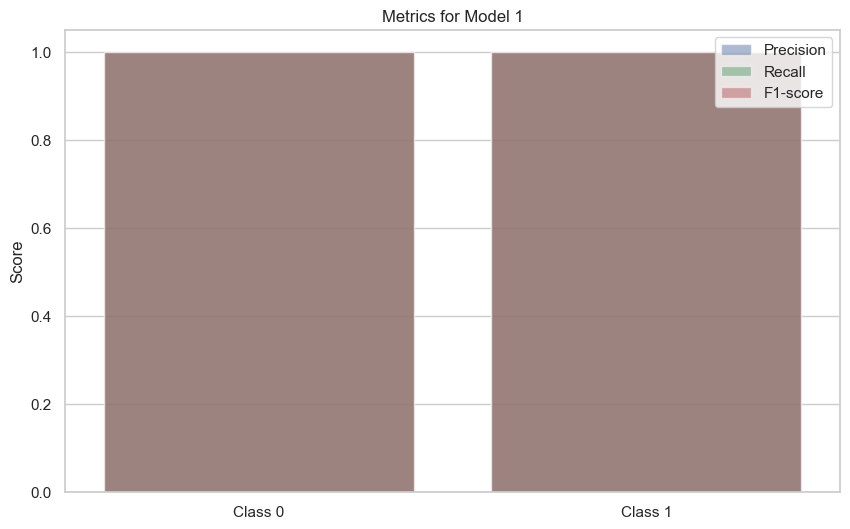

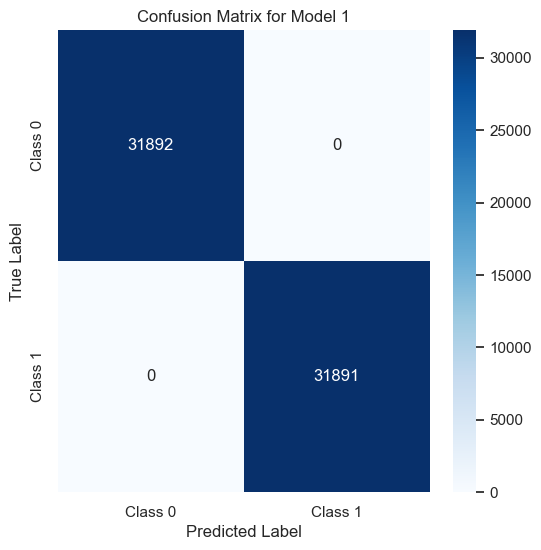

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metrics for Model 1
precision = [1.00, 1.00]
recall = [1.00, 1.00]
f1_score = [1.00, 1.00]
support = [31892, 31891]
classes = ['Class 0', 'Class 1']

# Create a confusion matrix
confusion_matrix = np.array([[precision[0] * support[0], (1 - precision[0]) * support[0]],
                            [(1 - precision[1]) * support[1], precision[1] * support[1]]])

# Create a bar plot for precision, recall, and F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=precision, color='b', alpha=0.5, label='Precision')
sns.barplot(x=classes, y=recall, color='g', alpha=0.5, label='Recall')
sns.barplot(x=classes, y=f1_score, color='r', alpha=0.5, label='F1-score')
plt.title('Metrics for Model 1')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model 1')
plt.show()


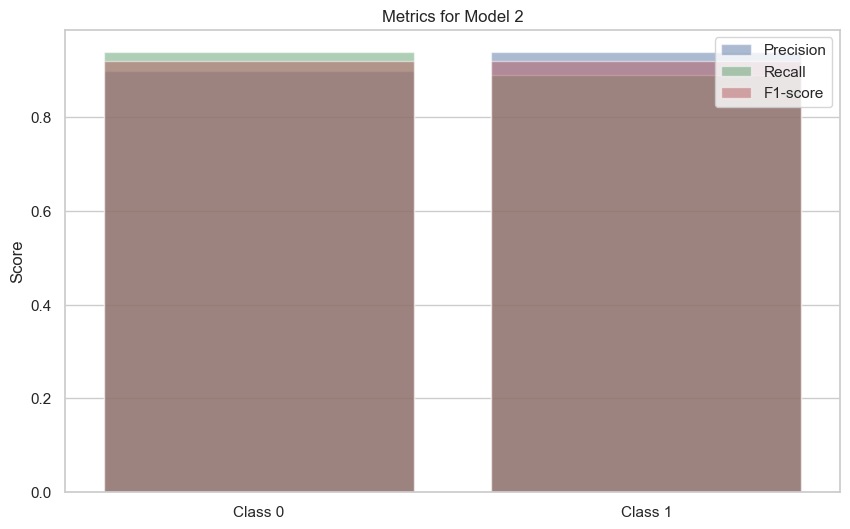

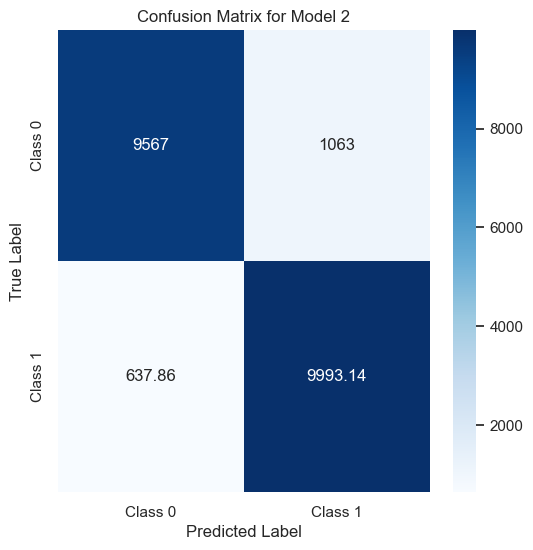

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metrics for Model 2
precision = [0.90, 0.94]
recall = [0.94, 0.89]
f1_score = [0.92, 0.92]
support = [10630, 10631]
classes = ['Class 0', 'Class 1']

# Create a confusion matrix
confusion_matrix = np.array([[precision[0] * support[0], (1 - precision[0]) * support[0]],
                            [(1 - precision[1]) * support[1], precision[1] * support[1]]])

# Create a bar plot for precision, recall, and F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=precision, color='b', alpha=0.5, label='Precision')
sns.barplot(x=classes, y=recall, color='g', alpha=0.5, label='Recall')
sns.barplot(x=classes, y=f1_score, color='r', alpha=0.5, label='F1-score')
plt.title('Metrics for Model 2')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model 2')
plt.show()


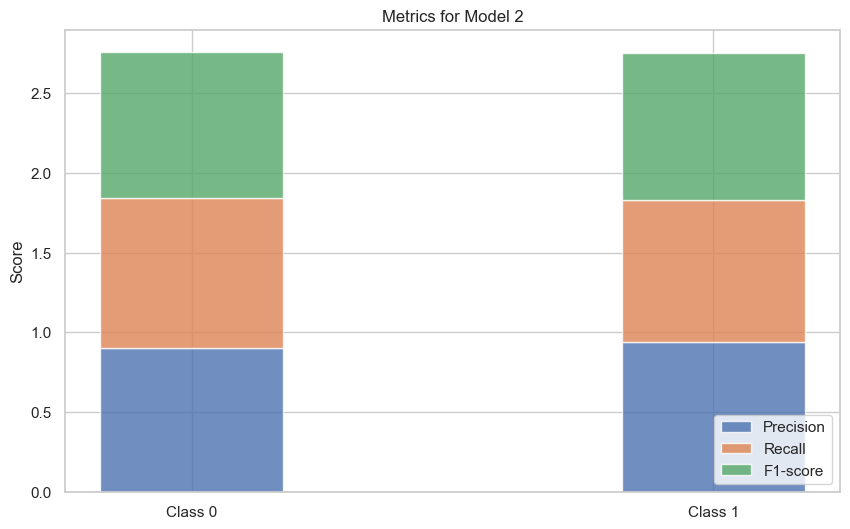

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Metrics for Model 2
model2_metrics = {
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.90, 0.94],
    'Recall': [0.94, 0.89],
    'F1-score': [0.92, 0.92],
    'Support': [10630, 10631]
}

# Create a pandas DataFrame for Model 2
model2_df = pd.DataFrame(model2_metrics)

# Set 'Class' as the index for the DataFrame
model2_df.set_index('Class', inplace=True)

# Create a grouped bar plot with error bars
plt.figure(figsize=(10, 6))
x = model2_df.index
width = 0.35

plt.bar(x, model2_df['Precision'], width, alpha=0.8, label='Precision')
plt.bar(x, model2_df['Recall'], width, alpha=0.8, label='Recall', bottom=model2_df['Precision'])
plt.bar(x, model2_df['F1-score'], width, alpha=0.8, label='F1-score', bottom=model2_df['Precision'] + model2_df['Recall'])

plt.title('Metrics for Model 2')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.show()


In [61]:
print(accuracy_score(y_train, y_pred_rf_train))
print("____"*30)
print(accuracy_score(y_test, y_pred_rf_test))


0.9999059310474578
________________________________________________________________________________________________________________________
0.9183011147170876


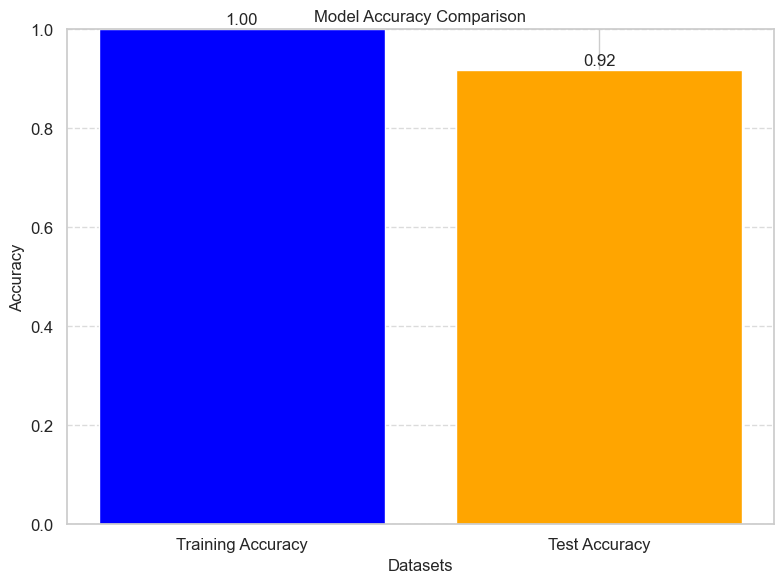

In [97]:


# Replace these with your actual accuracy scores
training_accuracy = 0.9999059310474578
test_accuracy = 0.9183011147170876

# Bar chart data
accuracy_data = [training_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_data, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set the y-axis limit to better show accuracy range (0 to 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Datasets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the actual accuracy values on top of the bars
for i, v in enumerate(accuracy_data):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

plt.tight_layout()

# Save the plot or show it
# plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


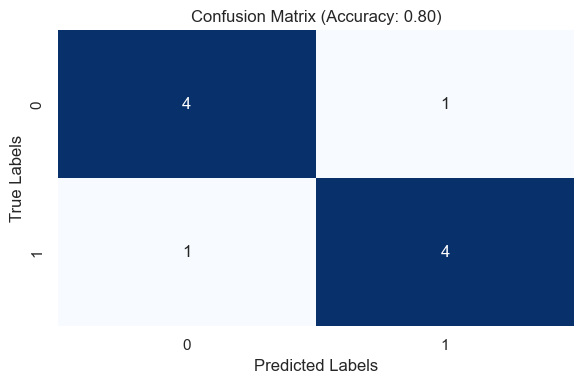

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Replace these with your actual target labels and predicted labels
y_test = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.tight_layout()

# Save the plot or show it
# plt.savefig('confusion_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Cross Validation

In [62]:
# Using K-FOLD method by using cross_val_score
accuracy = cross_val_score(rforest, x_train, y_train, cv=10)
accuracy

array([0.91832576, 0.91879605, 0.92067722, 0.91376607, 0.9132957 ,
       0.91658827, 0.92521167, 0.91392286, 0.91737222, 0.920508  ])

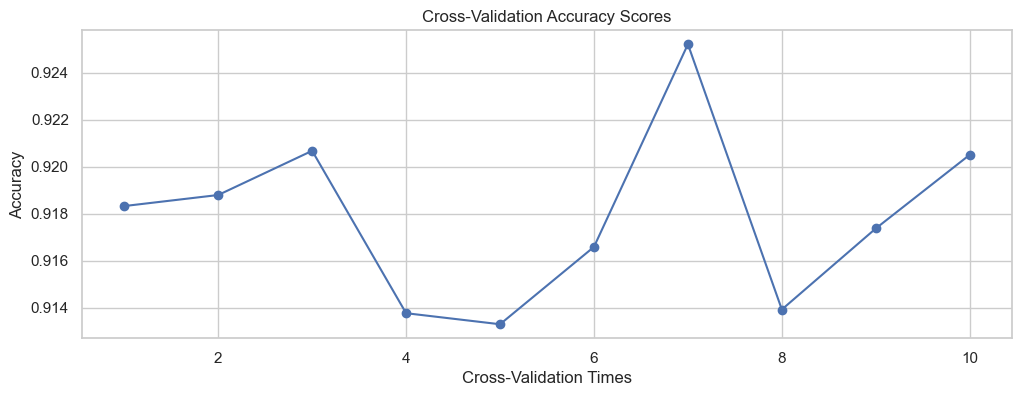

In [88]:
import matplotlib.pyplot as plt

# Assuming 'accuracy' contains the cross-validation accuracy scores

# Plotting the accuracy scores as a line plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(accuracy)+1), accuracy, marker='o', color='b')
plt.xlabel('Cross-Validation Times')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.grid(True)
plt.show()


Feature/variable contribution to the model. 

In [63]:
# Get feature importance scores
feature_importance = rforest.feature_importances_
feature_importance

array([6.54209985e-02, 7.63208093e-02, 8.40939203e-02, 7.25141489e-02,
       5.64338192e-02, 4.65457153e-02, 5.10045607e-02, 3.49003837e-02,
       1.07305123e-02, 1.01086839e-02, 1.88523926e-04, 8.34258069e-04,
       1.29676370e-03, 1.60738519e-02, 2.03074097e-02, 1.39565705e-02,
       1.70100039e-02, 1.74795388e-02, 2.02993034e-02, 1.77871517e-02,
       1.98937340e-05, 1.38270003e-06, 4.19929124e-07, 1.98196811e-04,
       1.10594331e-05, 1.75859044e-05, 1.22511452e-02, 1.85544361e-05,
       4.62718264e-05, 2.69508207e-05, 1.33536854e-04, 1.26382494e-04,
       8.65744691e-05, 9.60757264e-05, 2.25286465e-04, 2.03464300e-05,
       2.30594094e-05, 0.00000000e+00, 2.08158927e-07, 5.21062128e-06,
       1.13193188e-05, 7.98938881e-06, 1.50168888e-05, 1.28521736e-04,
       2.33899667e-04, 4.90930019e-05, 3.81998669e-04, 2.36132366e-04,
       9.41123933e-06, 3.24198019e-05, 3.70299062e-05, 3.78590340e-05,
       1.20387003e-04, 1.42022341e-04, 7.02464023e-05, 3.94685699e-06,
      

In [69]:
# If you have column names in your DataFrame X, you can create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance (descending order) to see the most important features at the top
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
2,length_of_stay,0.084094
1,purchase_lead,0.076321
3,flight_hour,0.072514
0,num_passengers,0.065421
823,booking_origin_Australia,0.057941
...,...,...
818,route_URTXIY,0.000000
656,route_MELSWA,0.000000
820,booking_origin_Afghanistan,0.000000
887,booking_origin_Papua New Guinea,0.000000


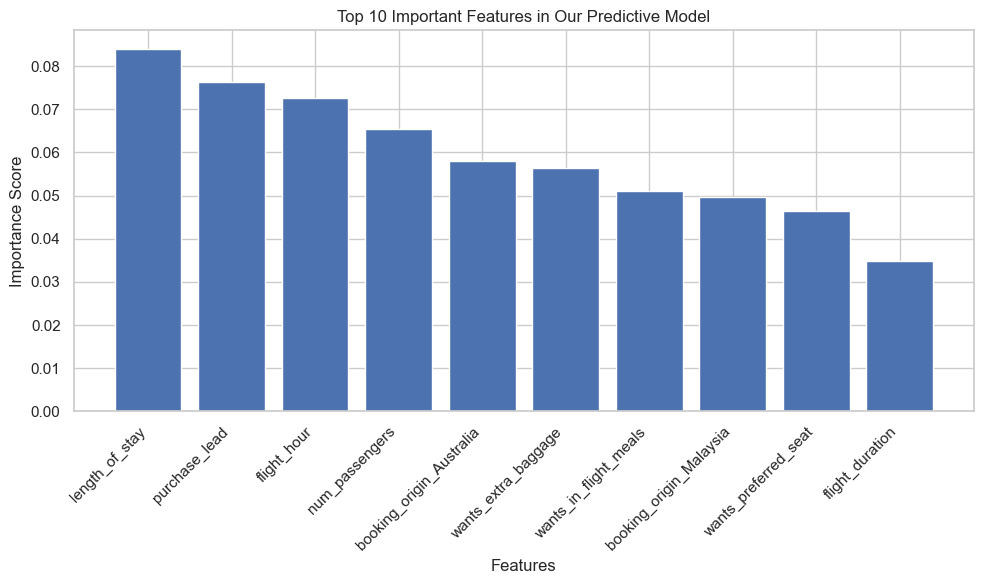

In [89]:
import matplotlib.pyplot as plt

# Select the top 10 important features
top_10_features = feature_importance_df.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Important Features in Our Predictive Model')
plt.tight_layout()  # To avoid overlapping labels
plt.show()
